# Итоговая работа

### 1. Загрузите файл HR.csv в pandas dataframe

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
#увеличим дефолтный размер графиков и подписей к ним
from pylab import rcParams
rcParams['figure.figsize'] = 18,7
rcParams['font.size'] = 14
data = pd.read_csv('HR.csv', sep=',')
data.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


In [197]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


В файле почти 15000 записей. Пропущенных значений нет. Судя по формулировке заданий в следующих пунктах, переводить качественные данные в аналог количественных не нужно (или это можно будет сделать потом в случае необходимости).   
Так что считаем, что с данными все ок, дополнительная их подготовка к работе не нужна.

### 2. Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).

In [198]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Основные статистики для количественных переменных можно получить с помощью .describe().   
Правда, медиана и мода при этом не считаются. Их можно рассчитать отдельно.   
Но, мне кажется, для анализа удобнее выводить сразу все статистики по каждой из исследуемых переменных. При этом можно не рассматривать "Work_accident", "left" и "promotion_last_5years" - в этих переменных всего 2 варианта значений - 1 (да) и 0 (нет). Соответственно, уже по средним меньше 0,5 можно сделать выводы о том, что мода и медиана будут равны 0.  

In [199]:
def statistics(param):

    print('Среднее значение: ', round(param.mean(), 2))
    print('Мода: ', param.mode()[0])
    print('Медиана: ', param.median())
    print('Максимальное значение: ', param.max())
    print('Минимальное значение: ', param.min())
#     print('Размах: ', (param.max() - param.min()))
    print('Среднее квадратическое отклонение: ', round(param.std(), 2))
#     print('Дисперсия: ', round(param.var(), 2))
#     Q1 = param.quantile(0.25)
#     Q3 = param.quantile(0.75)
#     print('Q1 - первый квартиль: ', Q1)
#     print('Q3 - третий квартиль: ', Q3)
#     print('Межквартильный размах: ', round((Q3-Q1), 2))

# И теперь сюда можно подставить все наши переменные
print('--------------', '\n', 'Уровень удовлетворенности работой', '\n')
statistics(data['satisfaction_level'])
print('--------------', '\n', 'Время с момента последней оценки в годах', '\n')
statistics(data['last_evaluation'])
print('--------------', '\n', 'Количество проектов, выполненных за время работы', '\n')
statistics(data['number_project'])
print('--------------', '\n', 'Среднее количество часов на рабочем месте в месяц', '\n')
statistics(data['average_montly_hours'])
print('--------------', '\n', 'Стаж работы в компании в годах', '\n')
statistics(data['time_spend_company'])

-------------- 
 Уровень удовлетворенности работой 

Среднее значение:  0.61
Мода:  0.1
Медиана:  0.64
Максимальное значение:  1.0
Минимальное значение:  0.09
Среднее квадратическое отклонение:  0.25
-------------- 
 Время с момента последней оценки в годах 

Среднее значение:  0.72
Мода:  0.55
Медиана:  0.72
Максимальное значение:  1.0
Минимальное значение:  0.36
Среднее квадратическое отклонение:  0.17
-------------- 
 Количество проектов, выполненных за время работы 

Среднее значение:  3.8
Мода:  4
Медиана:  4.0
Максимальное значение:  7
Минимальное значение:  2
Среднее квадратическое отклонение:  1.23
-------------- 
 Среднее количество часов на рабочем месте в месяц 

Среднее значение:  201.05
Мода:  135
Медиана:  200.0
Максимальное значение:  310
Минимальное значение:  96
Среднее квадратическое отклонение:  49.94
-------------- 
 Стаж работы в компании в годах 

Среднее значение:  3.5
Мода:  3
Медиана:  3.0
Максимальное значение:  10
Минимальное значение:  2
Среднее квадратическ

### 3. Рассчитайте и визуализируйте корреляционную матрицу для количественных переменных.  Определите две самые скоррелированные и две наименее скоррелированные переменные.

In [200]:
# корреляционная матрица
corr_matrix = data.corr()
print(corr_matrix)

                       satisfaction_level  last_evaluation  number_project  \
satisfaction_level               1.000000         0.105021       -0.142970   
last_evaluation                  0.105021         1.000000        0.349333   
number_project                  -0.142970         0.349333        1.000000   
average_montly_hours            -0.020048         0.339742        0.417211   
time_spend_company              -0.100866         0.131591        0.196786   
Work_accident                    0.058697        -0.007104       -0.004741   
left                            -0.388375         0.006567        0.023787   
promotion_last_5years            0.025605        -0.008684       -0.006064   

                       average_montly_hours  time_spend_company  \
satisfaction_level                -0.020048           -0.100866   
last_evaluation                    0.339742            0.131591   
number_project                     0.417211            0.196786   
average_montly_hours         

(8.0, 0.0)

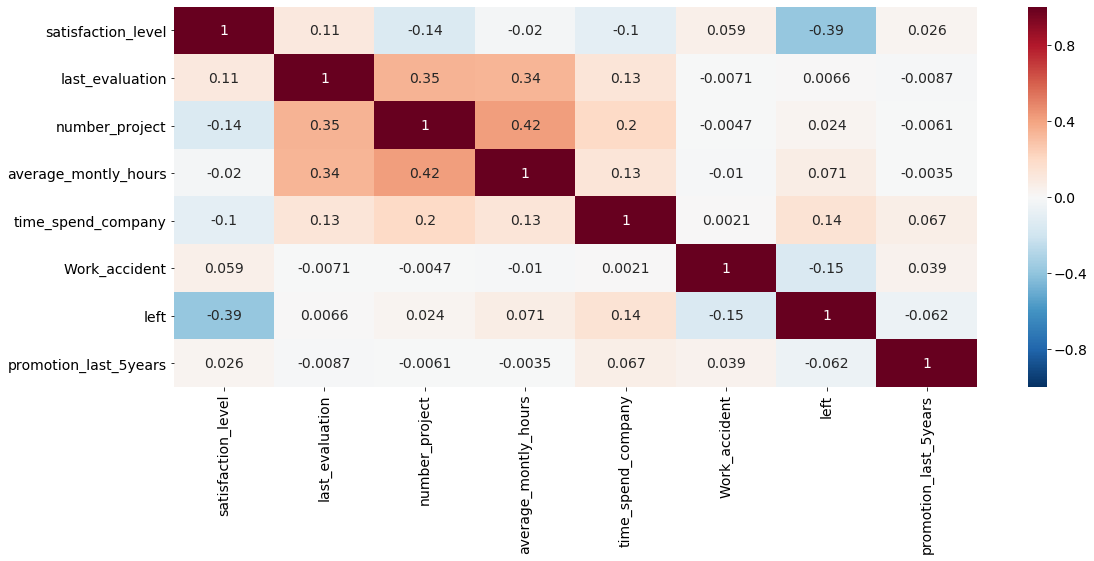

In [201]:
# и ее визуализация
correlation = data.corr()
ax = sns.heatmap(correlation, cmap=sns.color_palette("RdBu_r", 1000), vmin=-1, center=0, annot=True)
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5) #устанавливаем границы вручную

**В общем и целом особой корреляции между исследуемыми переменными нет - ни одно из значений по модулю не превышает 0,5.**  
Корреляция есть, если модуль коэффициента корреляции стремится к 1, и корреляция отсутсвует, если модуль коэффициента стремится к 0. Самые большие значения коэффициента корреляции: 
- 0,42 - между количеством проектов и средним количеством часов на рабочем месте в месяц. Прямая зависимость - большему числу проектов соответствует большее кол-во часов.
- -0,39 - между уровнем удовлетворенности и увольнениями. Обратная зависимость - увольняются те, у кого уровень удовлетворенности низкий. 

Две наименее скоррелированные переменные - происшествия на рабочем месте и стаж в компании - коэффициент корреляции для них равен 0,0021. Хотя вряд ли это чем-то лучше/хуже коэффициента корреляции -0,0035 между средним кол-вом рабочих часов в месяц и повышениями за последние 5 лет. Связи между переменными нет ни в том, ни в другом случае.  


### 4. Рассчитайте сколько сотрудников работает в каждом департаменте.

По идее, самый простой способ - сгруппировать сотрудников по департаментам. Но, учитывая содержание данных, так мы получим не кол-во сотрудников в каждом департаменте, а сколько человек из каждого департамента попало в базу данных исследования. Чтобы понять реальное число работающих, надо удалить из расчетов всех уволившихся. 
Поскольку неясно, что именно требуется сделать - пусть будет и то, и другое :) 

In [202]:
# распределение по департаментам всех когда-либо работавших в компании сотрудников (в общей базе данных)
departments = data[['satisfaction_level', 'department']].groupby('department').count().reset_index()
departments.columns = ['department_all', 'quantity']
departments.sort_values(by=['quantity'], ascending=[False])

,department_all,quantity
7,sales,4140
9,technical,2720
8,support,2229
0,IT,1227
6,product_mng,902
5,marketing,858
1,RandD,787
2,accounting,767
3,hr,739
4,management,630


In [203]:
# распределение по департаментам сотрудников, работающих в настоящее время
departments_1 = data[(data['left'] == 0)]
departments_2 = departments_1[['satisfaction_level', 'department']].groupby('department').count().reset_index()
departments_2.columns = ['department_now_working', 'quantity']
departments_2.sort_values(by=['quantity'], ascending=[False])

,department_now_working,quantity
7,sales,3126
9,technical,2023
8,support,1674
0,IT,954
6,product_mng,704
1,RandD,666
5,marketing,655
2,accounting,563
4,management,539
3,hr,524


### 5. Показать распределение сотрудников по зарплатам.

In [207]:
salary = data[['satisfaction_level', 'salary']].groupby('salary').count().reset_index()
salary.columns = ['salary_level', 'quantity']
salary['share_%'] = round(salary['quantity'] / 14999 * 100, 1)
salary.sort_values(by=['quantity'], ascending=[True])

,salary_level,quantity,share_%
0,high,1237,8.2
2,medium,6446,43.0
1,low,7316,48.8


### 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [208]:
sales_dep = data.pivot_table(index = 'salary', columns = 'department', values = 'left', aggfunc = 'count', fill_value = 0, margins = True).sort_values(by=['All'], ascending=[True]).reset_index()
sales_dep

department,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,All
0,high,83,51,74,45,225,80,68,269,141,201,1237
1,medium,535,372,335,359,225,376,383,1772,942,1147,6446
2,low,609,364,358,335,180,402,451,2099,1146,1372,7316
3,All,1227,787,767,739,630,858,902,4140,2229,2720,14999


### 7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [209]:
time_by_salary = data[['average_montly_hours', 'salary']].groupby('salary').mean().reset_index()
time_by_salary

,salary,average_montly_hours
0,high,199.867421
1,low,200.996583
2,medium,201.338349


Это очень  интересная гипотеза, учитывая, что в данном конкретном случае на имеющемся наборе данных считать мы можем только среднемесячное количество рабочих часов. И среднее арифметическое среднего кол-ва часов на работе у товарищей с высокой зарплатой на 1 час ниже, чем у товарищей с низкой зарплатой :) 
Но мы все равно можем проверить, является ли это различие между двумя группами статистически значимым. Что мы имеем:     
- Выборки разные по объему.   
- Наши данные количественные.   
- Мы не знаем, какое распределение они имеют.  
- Мы еще не смотрели, равны ли дисперсии. 

На лекции в рамках курса для такого типа данных расказывалось только о Т-тесте Стьюдента (который позволяет проверить гипотезу о том, является ли различие между средними значениями двух выборок статистически значимым или не является). Но в данном конкретном случае использование Т-теста может быть некорректным из-за разного объема выборок и неизвестного распределения.   
Поэтому для начала проверим, является ли распределение наших данных нормальным. 

In [210]:
# формируем выборку сотрудников с высокой зарплатой
high = data[data['salary'] == 'high']
high.head(3) 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
72,0.45,0.49,2,149,3,0,1,0,product_mng,high
111,0.09,0.85,6,289,4,0,1,0,hr,high
189,0.44,0.51,2,156,3,0,1,0,technical,high


In [211]:
# оцениваем
stat, p = scipy.stats.shapiro(high['average_montly_hours']) # тест Шапиро-Уилк
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

Statistics=0.971, p-value=0.000
Отклонить гипотезу о нормальности


In [212]:
# формируем выборку сотрудников с низкой зарплатой
low = data[data['salary'] == 'low'] 
low.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [213]:
# оцениваем
stat, p = scipy.stats.shapiro(low['average_montly_hours']) # тест Шапиро-Уилк
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

Statistics=0.960, p-value=0.000
Отклонить гипотезу о нормальности


C:\Users\weird\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


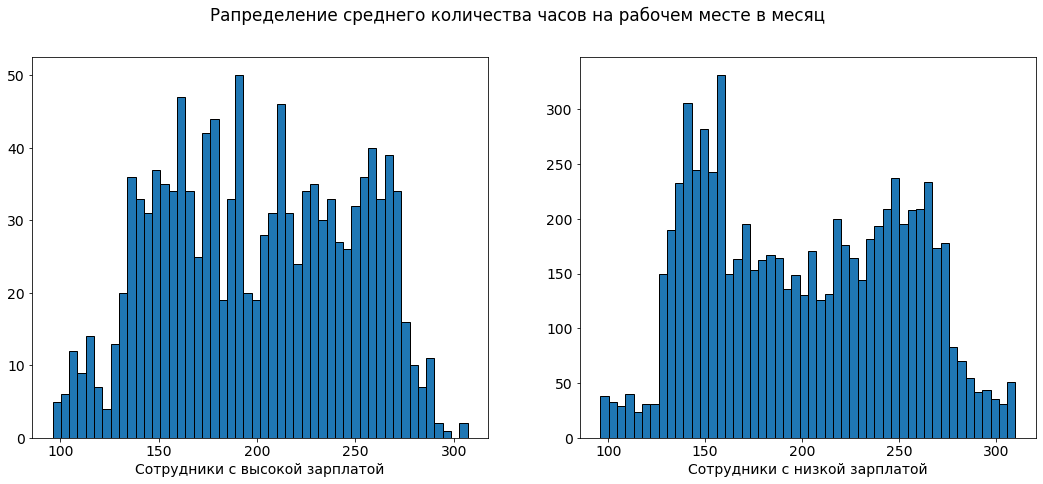

In [119]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Рапределение среднего количества часов на рабочем месте в месяц')
ax1.hist(high['average_montly_hours'], bins=50, histtype='bar', ec='k') 
ax2.hist(low['average_montly_hours'], bins=50, histtype='bar', ec='k') 
# ax1.axis([80,320,0,320]) # если вдруг захочется посмотреть на распределения в одном масштабе
# ax2.axis([80,320,0,320]) # если вдруг захочется посмотреть на распределения в одном масштабе
ax1.set_xlabel("Сотрудники с высокой зарплатой")
ax2.set_xlabel("Сотрудники с низкой зарплатой")
plt.show()

In [214]:
print('Среднее кол-во часов для сотрудников с высокой зарплатой: ', round(high['average_montly_hours'].mean(), 1))
print('Дисперсия для сотрудников с высокой зарплатой: ', round(high['average_montly_hours'].var(), 1))
print('Среднее кол-во часов для сотрудников с низкой зарплатой: ', round(low['average_montly_hours'].mean(), 1))
print('Дисперсия для сотрудников с низкой зарплатой: ', round(low['average_montly_hours'].var(), 1))

Среднее кол-во часов для сотрудников с высокой зарплатой:  199.9
Дисперсия для сотрудников с высокой зарплатой:  2276.3
Среднее кол-во часов для сотрудников с низкой зарплатой:  201.0
Дисперсия для сотрудников с низкой зарплатой:  2583.9


Получается, распределения у нас ненормальные, но визуально они чем-то похожи. Средние двух групп сотрудников очень близки. Дисперсии различаются, но это может быть в том числе и потому, что выборка сотрудников с низкой зарплатой почти в 6 раз больше выборки сотрудников с высокой зарплатой. 
В общем, интернет в таких случаях советует использовать U - критерий Манна-Уитни.  
*https://www.reneshbedre.com/blog/mann-whitney-u-test.html - Mann-Whitney U test (Wilcoxon rank sum test) in Python*   
  
  Один из возможных вариантов формулирования гипотез для этого критерия выглядит примерно так:   
Нулевая гипотеза: обе выборки имеют схожее распределение и одинаковую медиану  
Альтернативная гипотеза: распределение и медианы двух выборок отличаются  
  
  **И проверка по этому критерию показывает, что у нас нет оснований отвергать нулевую гипотезу. Сотрудники и с высокой, и с низкой зарплатой проводят на работе примерно одинаковое количество времени.**  


In [215]:
# Mann-Whitney U test
from scipy.stats import mannwhitneyu
data1 = high['average_montly_hours']
data2 = low['average_montly_hours']
# compare samples
stat, p = mannwhitneyu(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=4507096.500, p=0.412
Same distribution (fail to reject H0)


### 8. Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):   
● Доля сотрудников с повышением за последние 5 лет  
● Средняя степень удовлетворенности  
● Среднее количество проектов

In [216]:
# Доля сотрудников с повышением за последние 5 лет
# расчет
promotion_share = data[['promotion_last_5years', 'left']].groupby('left').agg(['count', 'sum']).reset_index()
promotion_share.columns = ['employees', 'quantity', 'promo_share']
promotion_share['share_%'] = round(promotion_share['promo_share'] / promotion_share['quantity'] * 100, 1)
# оформление 
promotion_share = promotion_share.astype({'employees': str})
promotion_share = promotion_share.replace('0', 'Работающие сотрудники')
promotion_share = promotion_share.replace('1', 'Уволившиеся сотрудники')
promotion_share.columns = ['Сотрудники', 'Общее кол-во', 'Кол-во получивших повышение', 'Доля сотрудников с повышением, %']
print('Доля сотрудников с повышением за последние 5 лет')
promotion_share

Доля сотрудников с повышением за последние 5 лет


,Сотрудники,Общее кол-во,Кол-во получивших повышение,"Доля сотрудников с повышением, %"
0,Работающие сотрудники,11428,300,2.6
1,Уволившиеся сотрудники,3571,19,0.5


In [217]:
# Средняя степень удовлетворенности и среднее кол-во проектов
# расчет
left_stayed = data[['satisfaction_level', 'number_project', 'left']].groupby('left').mean().round(2).reset_index()
# оформление 
left_stayed = left_stayed.astype({'left': str})
left_stayed = left_stayed.replace('0', 'Работающие сотрудники')
left_stayed = left_stayed.replace('1', 'Уволившиеся сотрудники')
left_stayed.columns = ['Сотрудники', 'Средний уровень удовлетворенности', 'Среднее количество проектов']
left_stayed

,Сотрудники,Средний уровень удовлетворенности,Среднее количество проектов
0,Работающие сотрудники,0.67,3.79
1,Уволившиеся сотрудники,0.44,3.86


### 9. Разделить данные на тестовую и обучающую выборки.  Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборке

In [218]:
# вспоминаем заголовки столбцов
data.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


In [219]:
# задаем факторы и предсказываемую переменную
X = data.iloc[:, [0, 1, 2, 3, 4, 5, 7]].values
y = data.iloc[:, 6].values

In [220]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [221]:
# проверяем кол-во наблюдений в тестовой выборке
len(y_test)

3000

In [222]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [223]:
lda = LinearDiscriminantAnalysis()

In [224]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [225]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [226]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [227]:
result.columns = ['test_data', 'predict_data']
result

,test_data,predict_data
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
2995,0,0
2996,0,0
2997,0,0
2998,0,0


In [228]:
# Оцениваем точность 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7613333333333333

Полученная модель правильно предсказывает, уволится сотрудник или нет, примерно в 76 % случаев

### 10. Загрузить jupyter notebook с решение на github и прислать ссылку